           date    close
0   24-OCT-2024  1936.95
1   25-OCT-2024  1894.35
2   28-OCT-2024  1931.50
3   29-OCT-2024  1937.60
4   30-OCT-2024  1982.85
..          ...      ...
95  11-MAR-2025  1482.45
96  12-MAR-2025  1459.75
97  13-MAR-2025  1437.80
98  17-MAR-2025  1428.50
99  18-MAR-2025  1480.15

[100 rows x 2 columns]
              Open         High          Low        Close  Shares Traded  \
count   122.000000   122.000000   122.000000   122.000000   1.220000e+02   
mean   1719.774180  1738.465984  1697.385246  1715.991393   3.811414e+07   
std     214.229658   211.644837   213.701017   211.473017   1.558253e+07   
min    1362.350000  1402.100000  1344.400000  1371.550000   5.818974e+06   
25%    1514.450000  1540.900000  1486.950000  1511.187500   2.738174e+07   
50%    1693.425000  1705.550000  1655.375000  1675.875000   3.522754e+07   
75%    1931.312500  1942.412500  1906.950000  1926.612500   4.598085e+07   
max    2091.400000  2095.650000  2061.950000  2083.950000   1.106509

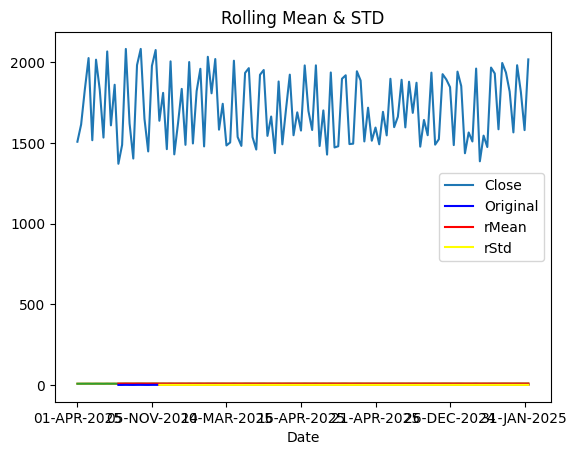

results of dikey-fuller test:
Test Statistic         -5.926045e+00
p-value                 2.442379e-07
#lags Used              1.000000e+01
#observations           1.000000e+02
Critical value (1%)    -3.497501e+00
Critical value (5%)    -2.890906e+00
Critical value (10%)   -2.582435e+00
dtype: float64


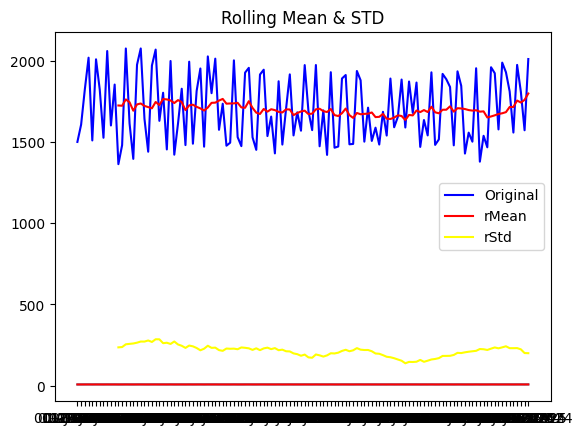

results of dikey-fuller test:
Test Statistic           -5.274321
p-value                   0.000006
#lags Used                5.000000
#observations           116.000000
Critical value (1%)      -3.488022
Critical value (5%)      -2.886797
Critical value (10%)     -2.580241
dtype: float64


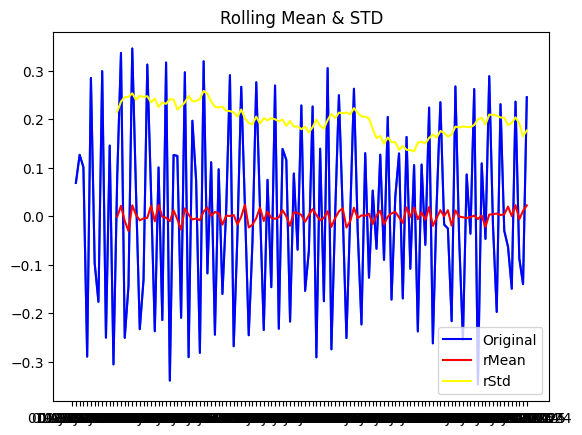

results of dikey-fuller test:
Test Statistic         -7.690796e+00
p-value                 1.421057e-11
#lags Used              1.300000e+01
#observations           1.070000e+02
Critical value (1%)    -3.492996e+00
Critical value (5%)    -2.888955e+00
Critical value (10%)   -2.581393e+00
dtype: float64


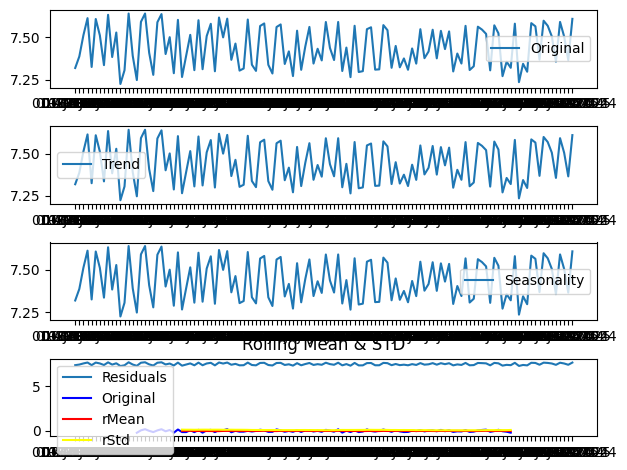

results of dikey-fuller test:
Test Statistic         -6.611301e+00
p-value                 6.367006e-09
#lags Used              1.100000e+01
#observations           8.000000e+01
Critical value (1%)    -3.514869e+00
Critical value (5%)    -2.898409e+00
Critical value (10%)   -2.586439e+00
dtype: float64


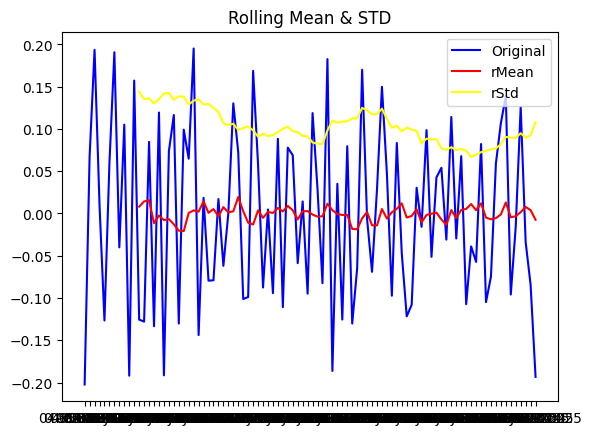

results of dikey-fuller test:
Test Statistic         -6.611301e+00
p-value                 6.367006e-09
#lags Used              1.100000e+01
#observations           8.000000e+01
Critical value (1%)    -3.514869e+00
Critical value (5%)    -2.898409e+00
Critical value (10%)   -2.586439e+00
dtype: float64
Plotting AR Model
Date
01-APR-2025    0.000000
01-FEB-2025    7.318738
01-JAN-2025    7.344893
01-NOV-2024    7.379534
02-APR-2025    7.420688
dtype: float64
Date
01-APR-2025      0.000000
01-FEB-2025      7.318738
01-JAN-2025     14.663631
01-NOV-2024     22.043165
02-APR-2025     29.463853
                  ...    
30-JAN-2025    871.074899
30-OCT-2024    878.531998
31-DEC-2024    885.934702
31-JAN-2025    893.358716
31-OCT-2024    900.815217
Length: 122, dtype: float64


,predicted_mean
122,7.400089
123,7.449586
124,7.437934
125,7.440677
126,7.440032
127,7.440184
128,7.440148
129,7.440156
130,7.440154
131,7.440155


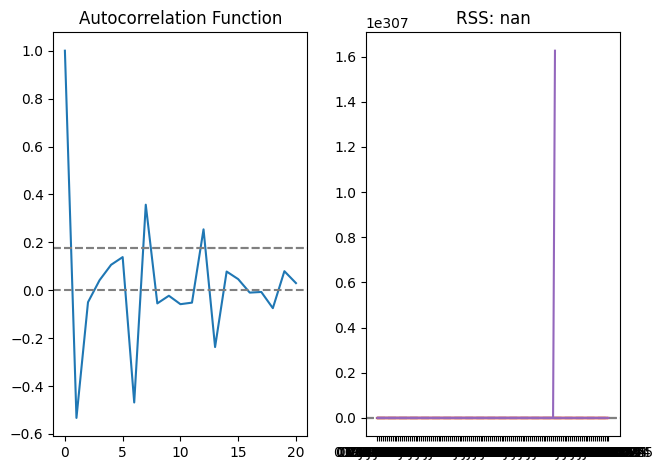

In [16]:

#!/usr/bin/env python
# coding: utf-8

# In[135]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# In[136]:


import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


# In[137]:


from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

get_ipython().run_line_magic('matplotlib', 'inline')


# In[138]:

df = pd.read_csv('/NIFTY MEDIA DATA SET.csv')
df.columns = df.columns.str.strip()

# Now you can access columns safely
df1 = df[['Date', 'Close']]
df1.columns = ['date', 'close']  # Rename for consistency

# Show the first 3 rows
print(df1.head(100))
df.head(3)


# In[139]:


print (df.describe())
print ("=============================================================")
print (df.dtypes)


# In[140]:


df1 = df[['Date','Close']]
df1.head(3)


# In[141]:


# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))


# In[142]:


df_ts[df_ts.isnull()]


# In[143]:


len(df_ts[df_ts.isnull()])


# In[144]:


df_ts = df_ts.sort_index()
df_ts.index


# In[145]:


df_ts.Close.fillna(method='pad', inplace=True)


# In[146]:


df_ts[df_ts.Close.isnull()]
len(df_ts[df_ts.Close.isnull()])


# In[147]:


df_ts.plot()


# In[148]:


# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")

    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)


# In[149]:


# Stationarity Check - Lets do a quick check on Stationarity with Dickey Fuller Test
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)


# In[152]:

rolstd = ts.rolling(window=365).std()
rolmean = ts.rolling(window=365).mean()
rolvar = ts.rolling(window=365).std()

#plt.figure(figsize=(10, 6))
#plt.plot(ts, label='Original', color='blue')
#plt.plot(rolmean, label='Rolling Mean', color='red')
#plt.plot(rolstd, label='Rolling Std Dev', color='black')
#plt.legend(loc='best')
#plt.title('Rolling Mean & Standard Deviation')
#plt.show(block=False)



# In[75]:


ts.dropna(inplace=True)
ts.head(5)
from statsmodels.tsa.stattools import adfuller


# In[77]:


print('results of dikey-fuller test:')
dftest=adfuller(ts, autolag='AIC')


# In[78]:


dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value

print (dfoutput)


# In[79]:


ts_logScale=np.log(ts)
plt.plot(ts_logScale)


# In[80]:


movingAverage=ts_logScale.rolling(window=12).mean()
movingSTD=ts_logScale.rolling(window=12).std()
plt.plot(ts_logScale)
plt.plot(movingAverage, color='red')


# In[81]:


ts_LogScaleMinusMA=ts_logScale-movingAverage
ts_LogScaleMinusMA.head(12)
ts_LogScaleMinusMA.dropna(inplace=True)
ts_LogScaleMinusMA.head(10)


# In[84]:


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(movingAverage, color='red', label='rMean')
    std=plt.plot(movingSTD, color='yellow', label='rStd')
    plt.legend(loc='best')
    plt.title('Rolling Mean & STD')
    plt.show(block=False)
    print('results of dikey-fuller test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', '#observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value

    print (dfoutput)


# In[85]:


test_stationarity(ts_LogScaleMinusMA)


# In[86]:


exponentialDecayWeightedAverage=ts_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')


# In[88]:


ts_LogScaleMinusExponentialDecayAverage= ts-exponentialDecayWeightedAverage
test_stationarity(ts_LogScaleMinusExponentialDecayAverage)


# In[89]:


ts_LogDiffShifting= ts_logScale-ts_logScale.shift()
plt.plot(ts_LogDiffShifting)


# In[90]:


ts_LogDiffShifting.dropna(inplace=True)
test_stationarity(ts_LogDiffShifting)


# In[92]:


ts_logScale.head()


# In[95]:


from statsmodels.tsa.seasonal import seasonal_decompose
ts_logScale.dropna(inplace=True)
decomposition = seasonal_decompose(ts_logScale, period=30)
trend =decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid


# In[96]:


plt.subplot(411)
plt.plot(ts_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(ts_logScale, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(ts_logScale, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(ts_logScale, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


# In[97]:


decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


# In[100]:


from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(ts_LogDiffShifting, nlags=20)
lag_pacf=pacf(ts_LogDiffShifting, nlags=20, method='ols')


# In[101]:


plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_LogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# In[114]:


from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(ts_logScale, order=(1,1,1))
results_AR = model.fit ()
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))
print('Plotting AR Model')


# In[115]:


model=ARIMA(ts_logScale, order=(1,1,1))
results_ARIMA = model.fit ()
plt.plot(ts_LogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_LogDiffShifting)**2))


# In[117]:


predicitons_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predicitons_ARIMA_diff.head())


# In[118]:


predicitons_ARIMA_diff_cumsum=predicitons_ARIMA_diff.cumsum()
print(predicitons_ARIMA_diff_cumsum)


# In[121]:


predictions_ARIMA_log=pd.Series(ts_logScale.iloc[0], index=ts_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predicitons_ARIMA_diff_cumsum, fill_value=0)


# In[123]:


predictions_ARIMA_log.head()


# In[124]:


predicitons_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predicitons_ARIMA)


# In[125]:


ts_logScale


# In[127]:


results_ARIMA.predict(1,9575)


# In[132]:


results_ARIMA.forecast(14)